In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("Covid Data.csv")
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


USMER                            1
MEDICAL_UNIT                     2
SEX                              2
PATIENT_TYPE                     2
DATE_DIED               05/04/2020
INTUBED                          1
PNEUMONIA                        1
AGE                             14
PREGNANT                        97
DIABETES                         2
COPD                             2
ASTHMA                           2
INMSUPR                          2
HIPERTENSION                     2
OTHER_DISEASE                    2
CARDIOVASCULAR                   2
OBESITY                          2
RENAL_CHRONIC                    2
TOBACCO                          2
CLASIFFICATION_FINAL             7
ICU                              2
Name: 152, dtype: object

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['usmer', 'medical_unit', 'sex', 'patient_type', 'date_died', 'intubed',
       'pneumonia', 'age', 'pregnant', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hipertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'clasiffication_final', 'icu'],
      dtype='object')

In [7]:
df.iloc[154]

usmer                            1
medical_unit                     2
sex                              2
patient_type                     2
date_died               20/05/2020
intubed                          1
pneumonia                        1
age                             17
pregnant                        97
diabetes                         2
copd                             2
asthma                           2
inmsupr                          2
hipertension                     2
other_disease                    2
cardiovascular                   2
obesity                          2
renal_chronic                    2
tobacco                          2
clasiffication_final             7
icu                              2
Name: 154, dtype: object

In [44]:
df['clasiffication_final'] = [0 if test > 3 else test for test in df['clasiffication_final']]
df['clasiffication_final'].value_counts()

0    656596
3    381527
1      8601
2      1851
Name: clasiffication_final, dtype: int64

In [45]:
df_class_final = df.melt(value_vars=['clasiffication_final'])
df_class_final

,variable,value
0,clasiffication_final,3
1,clasiffication_final,0
2,clasiffication_final,3
3,clasiffication_final,0
4,clasiffication_final,3
...,...,...
1048570,clasiffication_final,0
1048571,clasiffication_final,0
1048572,clasiffication_final,0
1048573,clasiffication_final,0


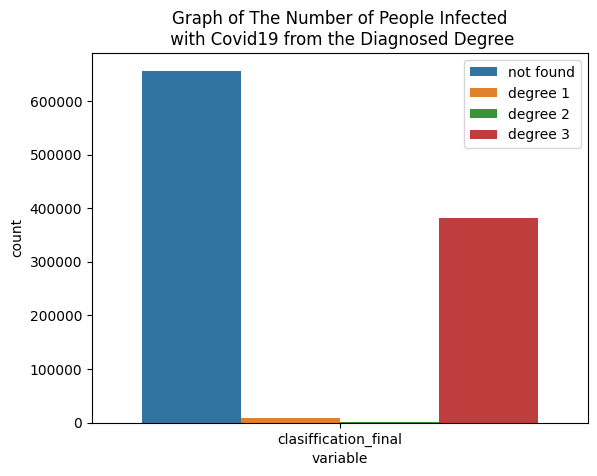

In [46]:
sns.countplot(data=df_class_final, x='variable', hue='value')
plt.title('Graph of The Number of People Infected\n with Covid19 from the Diagnosed Degree')
L=plt.legend()
L.get_texts()[0].set_text('not found')
L.get_texts()[1].set_text('degree 1')
L.get_texts()[2].set_text('degree 2')
L.get_texts()[3].set_text('degree 3')
plt.savefig(fname='plots_png/number_diagnosed_degree.png', format='png')
plt.show()

In [47]:
df_death_set = {'death': ['survived' if value=='9999-99-99' else 'died' for value in df['date_died']]}
df_died_sex = pd.DataFrame(data=df_death_set)
df_died_sex['sex'] = ['woman' if value==1 else 'man' for value in df['sex']]
df_died_sex

,death,sex
0,died,woman
1,died,man
2,died,man
3,died,woman
4,died,man
...,...,...
1048570,survived,man
1048571,survived,man
1048572,survived,man
1048573,survived,man


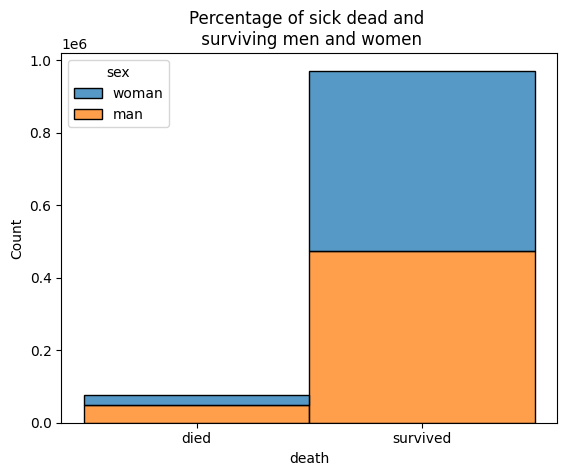

In [48]:
plt.title('Percentage of sick dead and \n surviving men and women')
sns.histplot(data=df_died_sex, x='death', hue='sex', multiple="stack")
plt.savefig(fname='plots_png/dead_sex_man.png', format='png')
plt.show()

In [49]:
df_died_sex['sex'].value_counts()

woman    525064
man      523511
Name: sex, dtype: int64

In [50]:
df_died_sex['death'].value_counts()

survived    971633
died         76942
Name: death, dtype: int64

In [51]:
#df_medical_unit = pd.DataFrame(data=df['medical_unit'].values, columns=['medical_unit'])
#df_medical_unit = pd.get_dummies(df_medical_unit['medical_unit'])
#df_medical_unit

In [52]:
#df1 = df_medical_unit_set[df_medical_unit_set['value'].values==1]

df_medical_unit = pd.DataFrame(data=df['medical_unit'].values, columns=['medical_unit'])
df_medical_unit['sex'] = df_died_sex['sex']
df_medical_unit

,medical_unit,sex
0,1,woman
1,1,man
2,1,man
3,1,woman
4,1,man
...,...,...
1048570,13,man
1048571,13,man
1048572,13,man
1048573,13,man


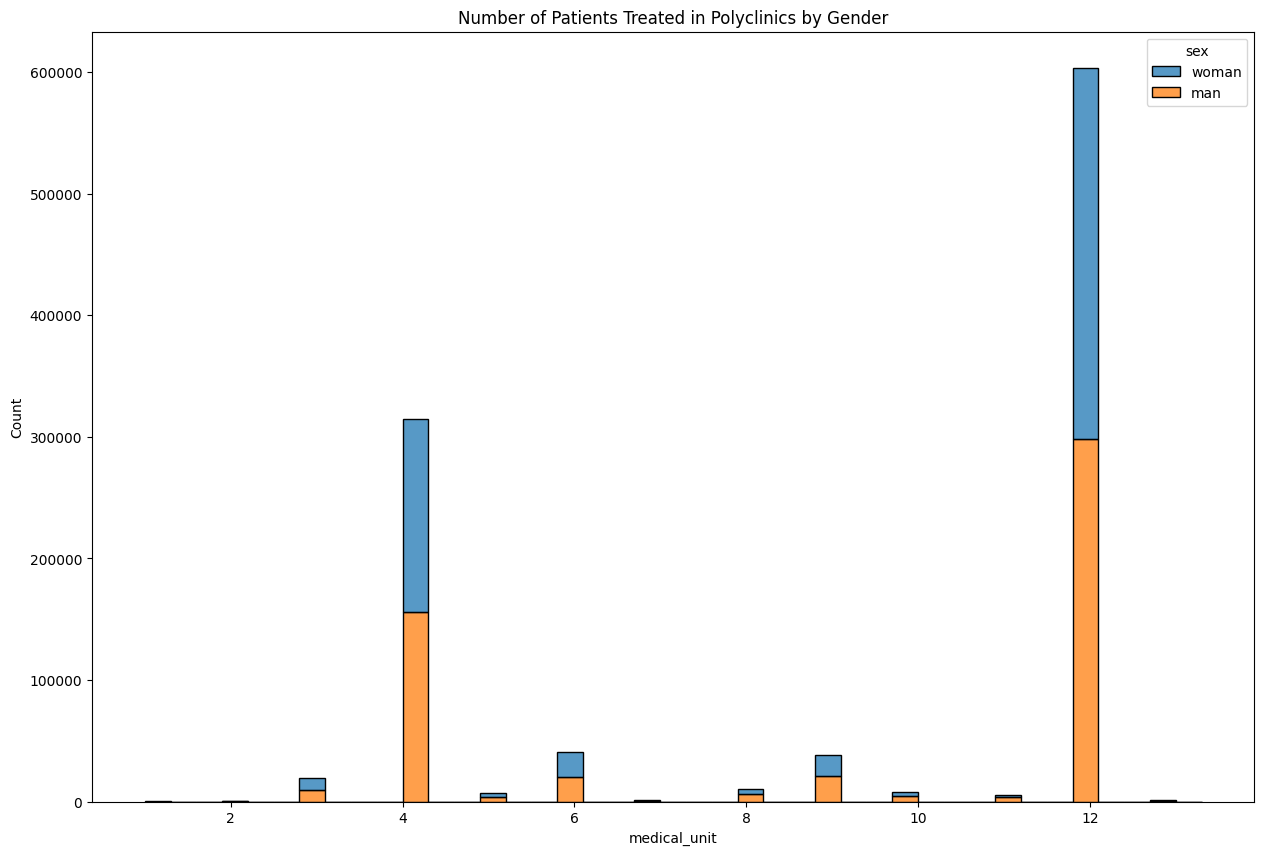

In [59]:
plt.figure(figsize=(15, 10))
sns.histplot(data=df_medical_unit, x='medical_unit', hue='sex', multiple="stack", binwidth=0.3)
plt.title('Number of Patients Treated in Polyclinics by Gender')
plt.savefig(fname='plots_png/medical_unit_sex_man.png', format='png')
plt.show()

In [54]:
num_death ={1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0}

for num in df['medical_unit'].values:
    sum_n = 0
    sum_n = num_death.get(num) + 1
    num_death.update({num:sum_n})
num_death

{1: 151,
 2: 169,
 3: 19175,
 4: 314405,
 5: 7244,
 6: 40584,
 7: 891,
 8: 10399,
 9: 38116,
 10: 7873,
 11: 5577,
 12: 602995,
 13: 996}

In [55]:
df_medical_unit_death = pd.DataFrame(data=df['medical_unit'].values, columns=['medical_unit'])
df_medical_unit_death['death'] = df_died_sex['death']
df_medical_unit_death

,medical_unit,death
0,1,died
1,1,died
2,1,died
3,1,died
4,1,died
...,...,...
1048570,13,survived
1048571,13,survived
1048572,13,survived
1048573,13,survived


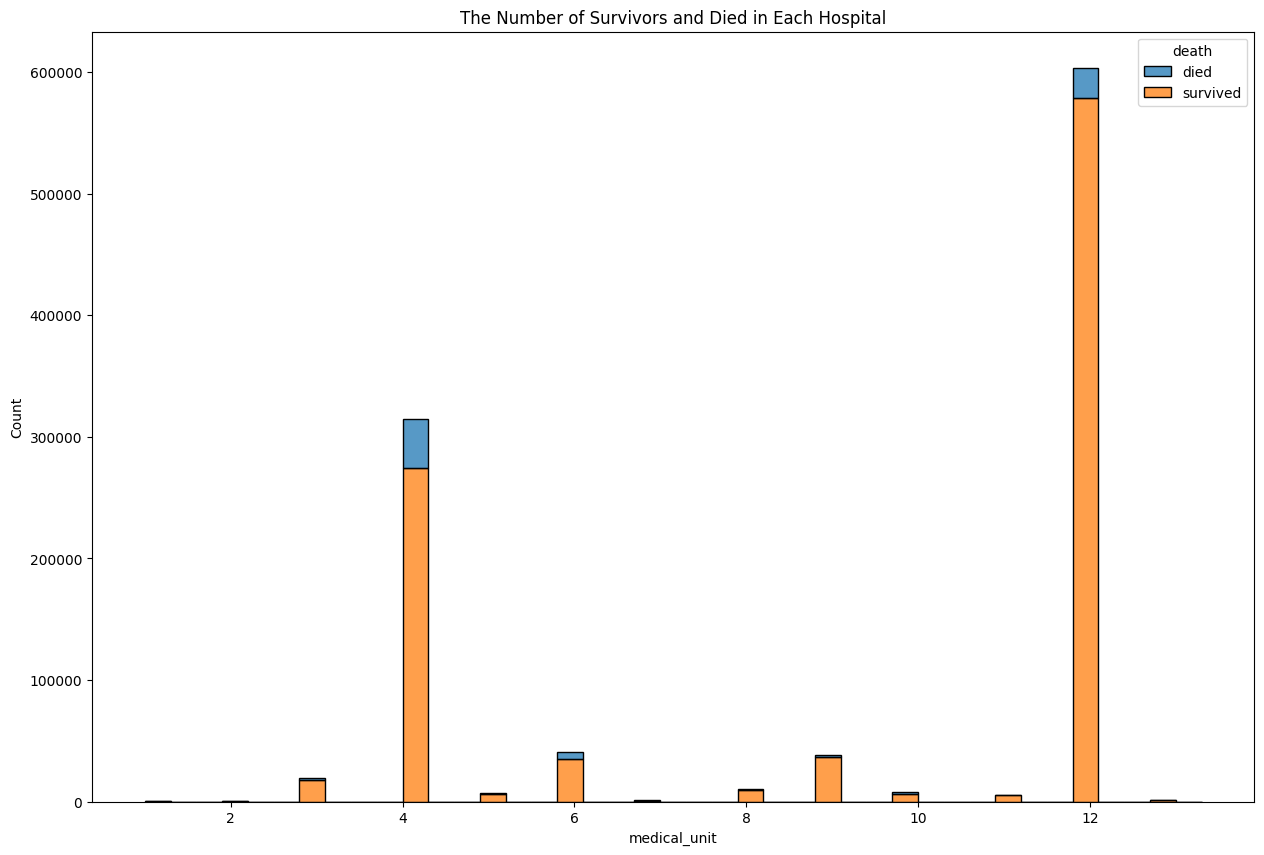

In [58]:
plt.figure(figsize=(15, 10))
sns.histplot(data=df_medical_unit_death, x='medical_unit', hue='death', multiple="stack", binwidth=0.3)
plt.title('The Number of Survivors and Died in Each Hospital')
plt.savefig(fname='plots_png/medical_unit_death.png', format='png')
plt.show()